## Random Forest

### Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Making Data Frame

In [23]:
data_path = 'diabetes.csv'
df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Scaling Data

In [24]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler() 
x_scaled = scaler.fit_transform(x)

### Train Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40)

### Training the Model

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=40) 
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=40)

### Making Predictions

In [27]:
# Make predictions on the test set
y_pred = rf.predict(x_test)

# Display the predicted values
print("Actual labels: ", y_test.values) 
print("Predicted labels:", y_pred)

Actual labels:  [1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1
 0 0 1 1 0 0]
Predicted labels: [1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0]


### Evaluating Model

Confusion Matrix:
 [[85 10]
 [26 33]]


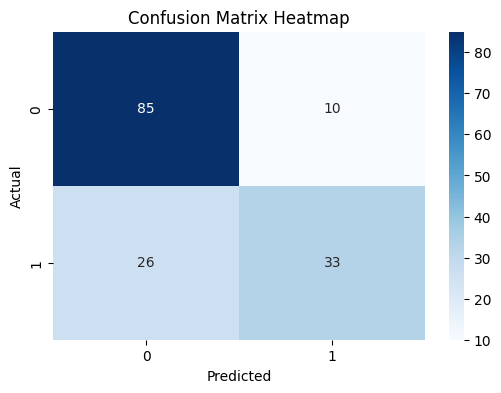

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        95
           1       0.77      0.56      0.65        59

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154

Accuracy: 0.7662337662337663


In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


### Feature Importance

C:\Users\prath\AppData\Local\Temp\ipykernel_8268\1662045924.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')


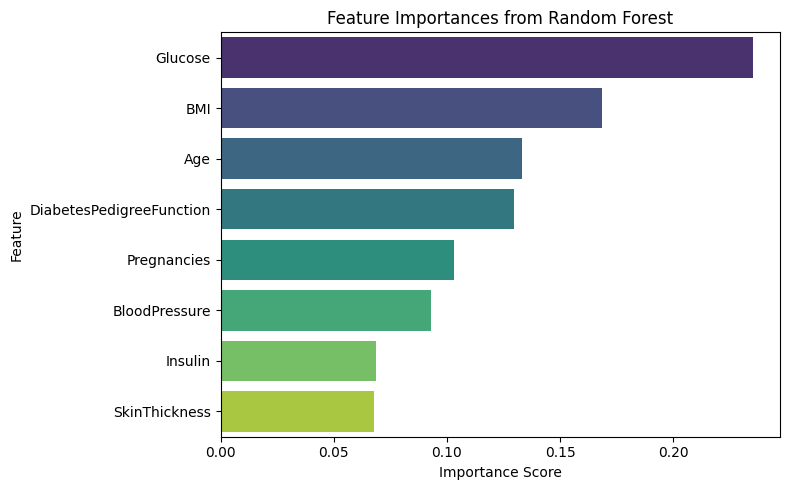

In [37]:
# Get feature importances from the model
importances = rf.feature_importances_
feature_names = x.columns

# Create a DataFrame for better plotting
feat_importances = pd.Series(importances, index=feature_names)

# Sort feature importances
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()